In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('max_colwidth', 800)
plt.rcParams['figure.figsize'] = [15, 15]

In [21]:
bbc = pd.read_csv('bbc.csv')
bbc.head()

,category,text
0,tech,tv future in the hands of viewers with home theatre systems plasma high-definition tvs and digital video recorders moving into the living room the way people watch tv will be radically different in five years time. that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend programmes and other content will be delivered to viewers via home networks through cable satellite telecoms companies and broadband service providers to front rooms and portable devices. one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes like the us s tivo and the uk s sky...
1,business,worldcom boss left books alone former worldcom boss bernie ebbers who is accused of overseeing an $11bn (Â£5.8bn) fraud never made accounting decisions a witness has told jurors. david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors. on monday defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination he asked mr myers if he ever knew mr ebbers make an accounting decision . not that i am aware of mr myers replied. did you ever know mr ebbers to mak...
2,sport,tigers wary of farrell gamble leicester say they will not be rushed into making a bid for andy farrell should the great britain rugby league captain decide to switch codes. we and anybody else involved in the process are still some way away from going to the next stage tigers boss john wells told bbc radio leicester. at the moment there are still a lot of unknowns about andy farrell not least his medical situation. whoever does take him on is going to take a big big gamble. farrell who has had persistent knee problems had an operation on his knee five weeks ago and is expected to be out for another three months. leicester and saracens are believed to head the list of rugby union clubs interested in signing farrell if he decides to move to the 15-man game. if he does move...
3,sport,yeading face newcastle in fa cup premiership side newcastle united face a trip to ryman premier league leaders yeading in the fa cup third round. the game - arguably the highlight of the draw - is a potential money-spinner for non-league yeading who beat slough in the second round. conference side exeter city who knocked out doncaster on saturday will travel to old trafford to meet holders manchester united in january. arsenal were drawn at home to stoke and chelsea will play host to scunthorpe. the only other non-league side in the draw are hinckley united who held brentford to a goalless draw on sunday. they will meet league one leaders luton if they win their replay against martin allen s team at griffin park. a number of premiership teams face difficult away games against cha...
4,entertainment,ocean s twelve raids box office ocean s twelve the crime caper sequel starring george clooney brad pitt and julia roberts has gone straight to number one in the us box office chart. it took $40.8m (Â£21m) in weekend ticket sales according to studio estimates. the sequel follows the master criminals as they try to pull off three major heists across europe. it knocked last week s number one national treasure into third place. wesley snipes blade: trinity was in second taking $16.1m (Â£8.4m). rounding out the top five was animated fable the polar express starring tom hanks and festive comedy christmas with the kranks. ocean s twelve box office triumph marks the fourth-biggest opening for a december release in the us after the three films in the lord of the rings trilogy. the 

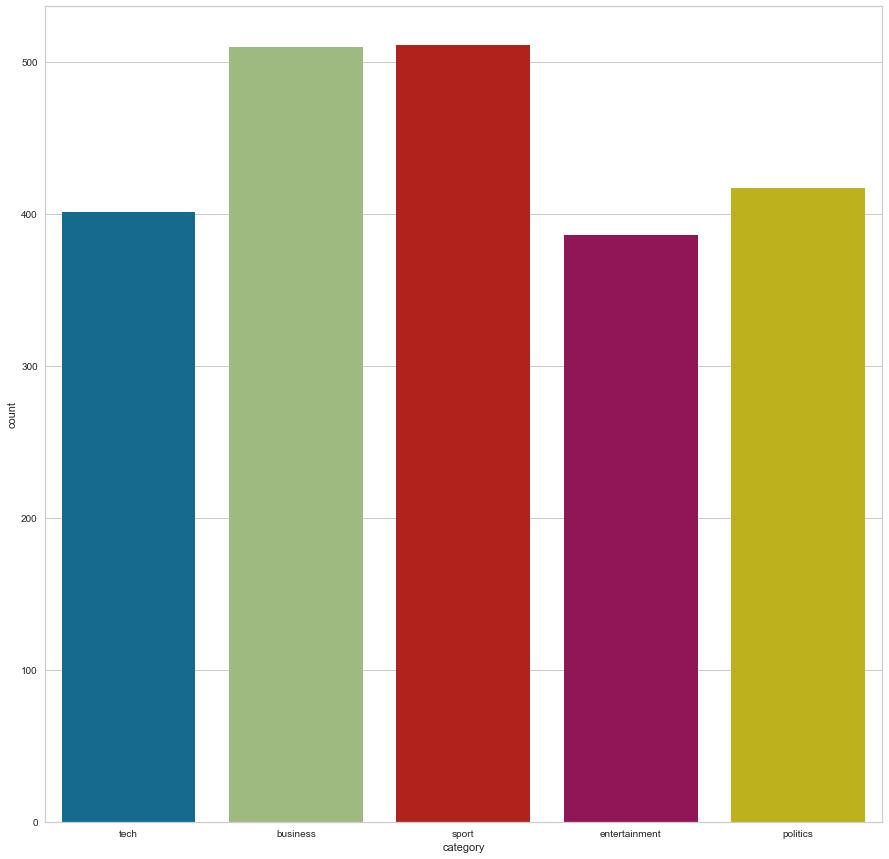

In [22]:
sns.countplot('category', data=bbc)

In [23]:
def func(x):
    return len(x.split(' '))

bbc[bbc['category']=='tech']['text'].apply(func).describe()

count     401.000000
mean      543.466334
std       262.818549
min       170.000000
25%       368.000000
50%       479.000000
75%       682.000000
max      3229.000000
Name: text, dtype: float64

In [24]:
bbc[bbc['category']=='business']['text'].apply(func).describe()

count    510.000000
mean     358.243137
std      149.461482
min      149.000000
25%      253.250000
50%      323.500000
75%      423.250000
max      994.000000
Name: text, dtype: float64

In [25]:
bbc[bbc['category']=='sport']['text'].apply(func).describe()

count     511.000000
mean      363.203523
std       206.238292
min       122.000000
25%       221.000000
50%       314.000000
75%       454.500000
max      1778.000000
Name: text, dtype: float64

In [26]:
bbc[bbc['category']=='entertainment']['text'].apply(func).describe()

count     386.000000
mean      364.357513
std       291.749255
min       155.000000
25%       245.000000
50%       290.500000
75%       403.000000
max      3866.000000
Name: text, dtype: float64

In [27]:
bbc[bbc['category']=='politics']['text'].apply(func).describe()

count     417.000000
mean      496.611511
std       323.724253
min        94.000000
25%       346.000000
50%       486.000000
75%       580.000000
max      4759.000000
Name: text, dtype: float64

In [32]:
from yellowbrick.text import FreqDistVisualizer
from yellowbrick.text import TSNEVisualizer
from yellowbrick.text import UMAPVisualizer
from yellowbrick.text import DispersionPlot
from yellowbrick.text import PosTagVisualizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text

bbc_stop_words = ['said', 'people', 'new', 'mr']
custom_stop_words = text.ENGLISH_STOP_WORDS.union(bbc_stop_words)

In [168]:
vectorizer = CountVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(bbc['text'])
features = vectorizer.get_feature_names()

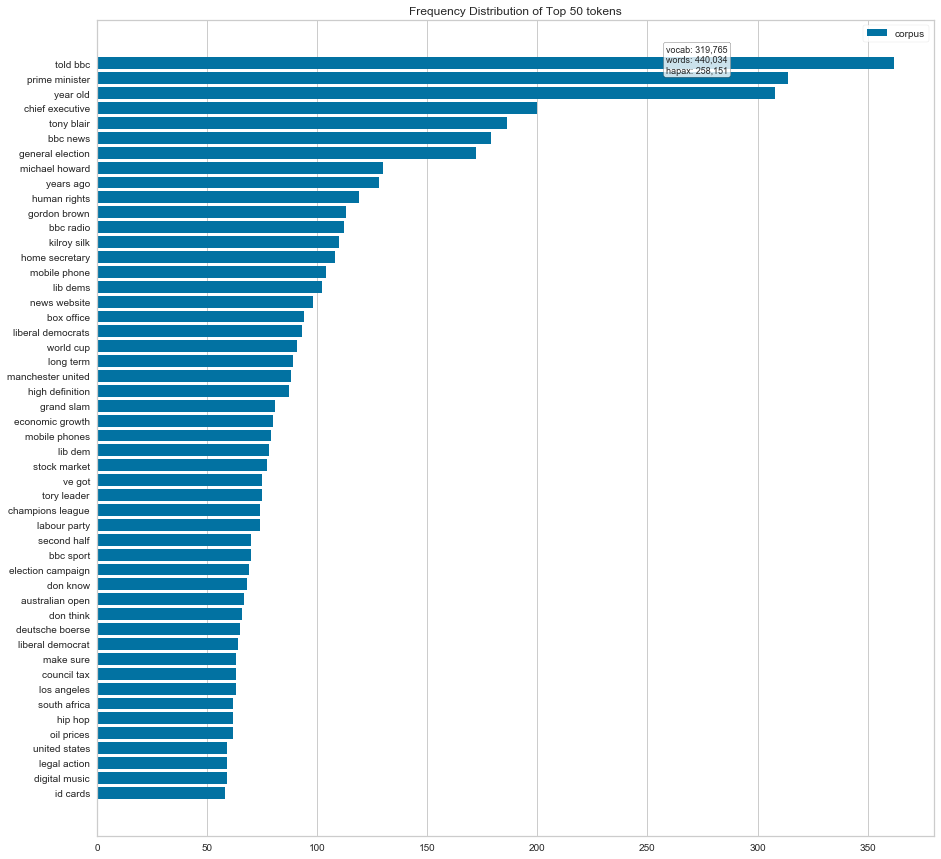

In [169]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

In [172]:
# https://www.scikit-yb.org/en/latest/api/text/freqdist-3.py
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['tech'])
features = vectorizer.get_feature_names()

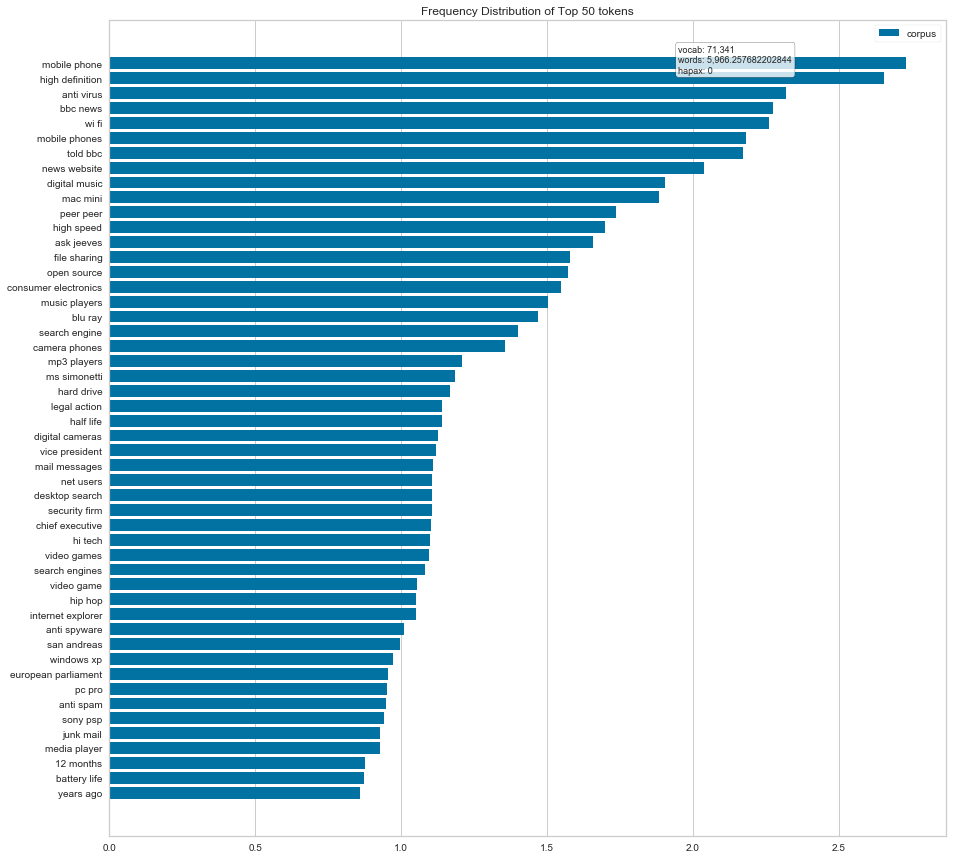

In [173]:
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

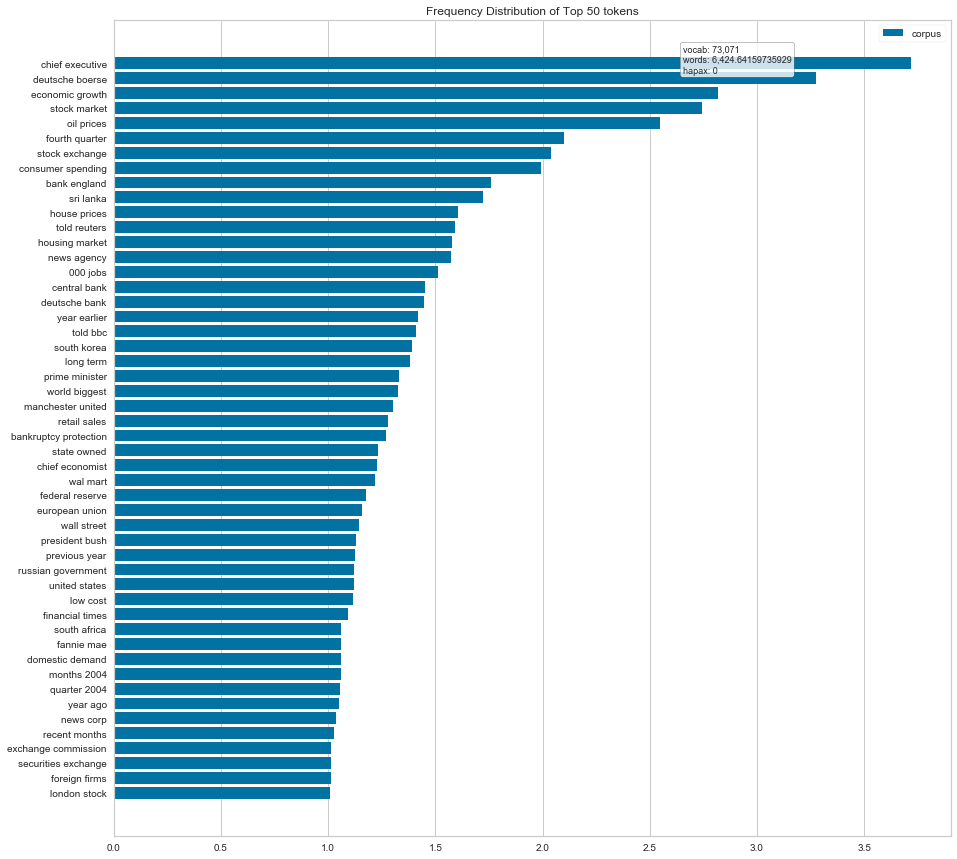

In [175]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['business'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

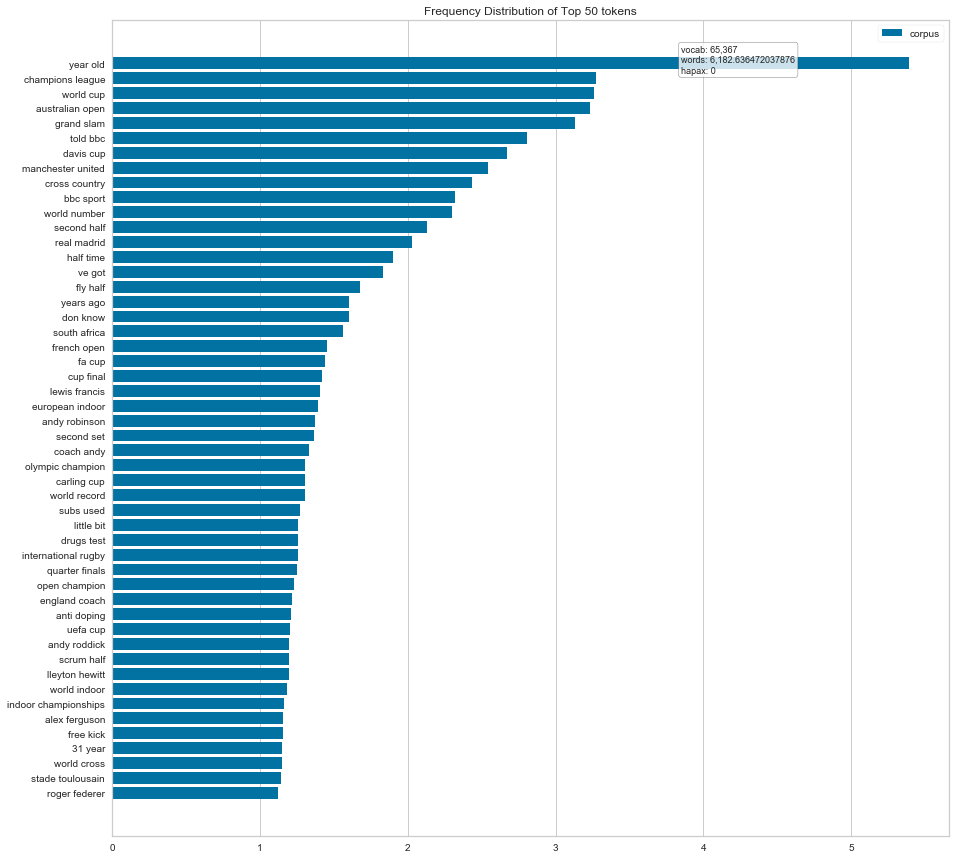

In [166]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorizer = TfidfVectorizer(stop_words=custom_stop_words, ngram_range=(2,2))
docs = vectorizer.fit_transform(text for text in articles['sport'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

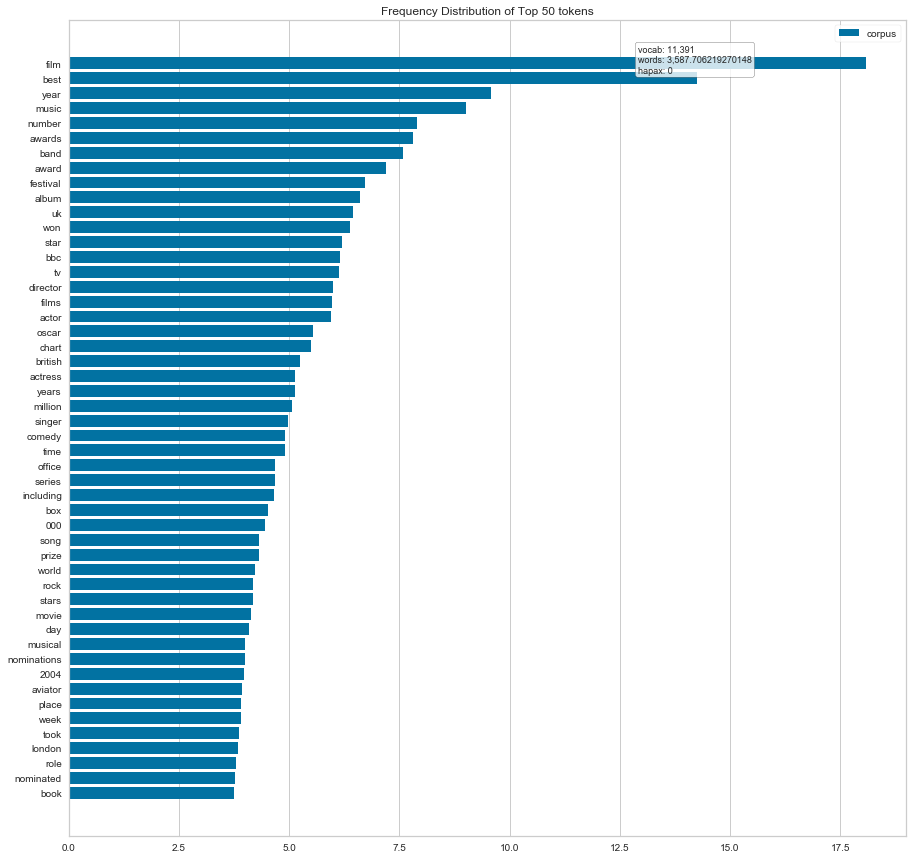

In [162]:
docs = vectorizer.fit_transform(text for text in articles['entertainment'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

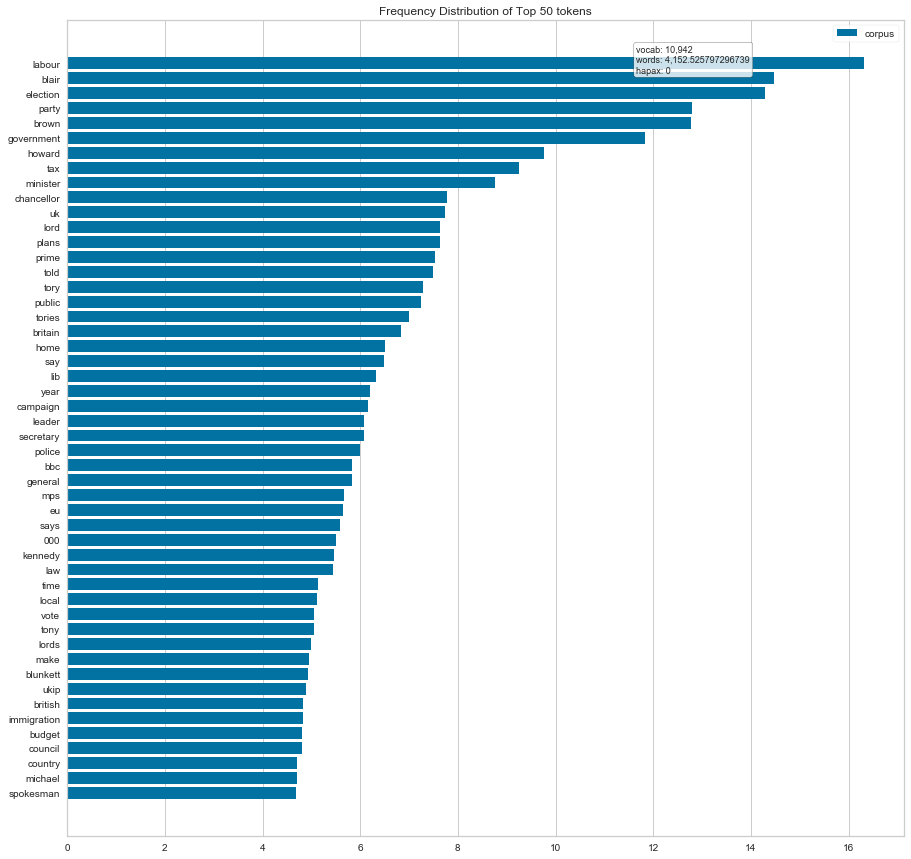

In [161]:
from collections import defaultdict
articles = defaultdict(list)
for text, label in zip(bbc['text'], bbc['category']):
  articles[label].append(text)
vectorize = CountVectorizer(stop_words=custom_stop_words)
docs = vectorizer.fit_transform(text for text in articles['politics'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features)
visualizer.fit(docs)
visualizer.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

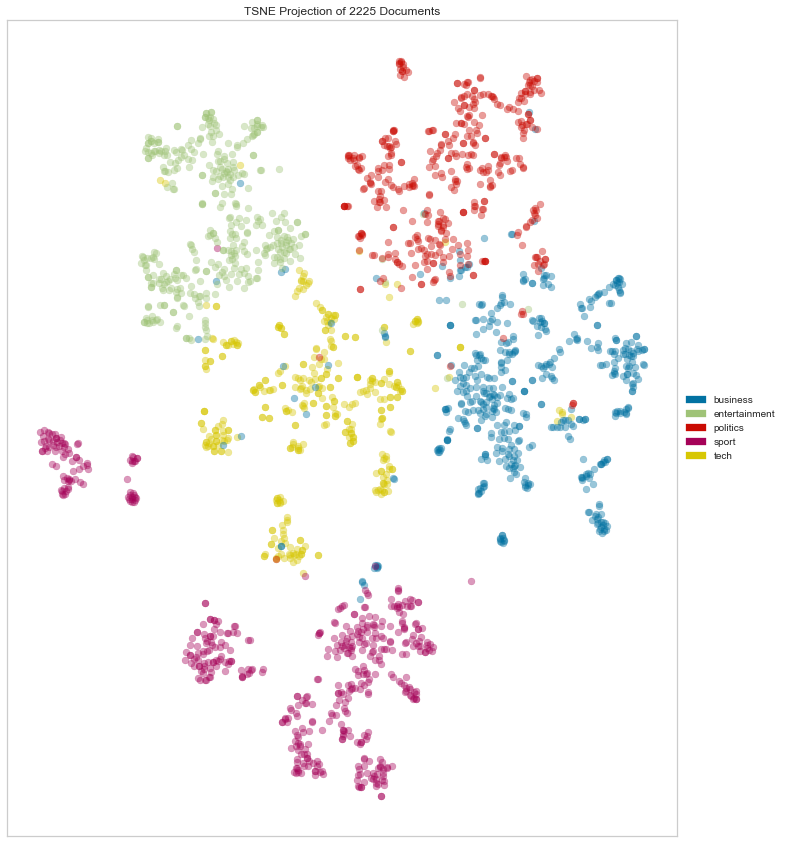

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words=custom_stop_words)
X = tfidf.fit_transform(bbc['text'])
y = bbc['category']
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

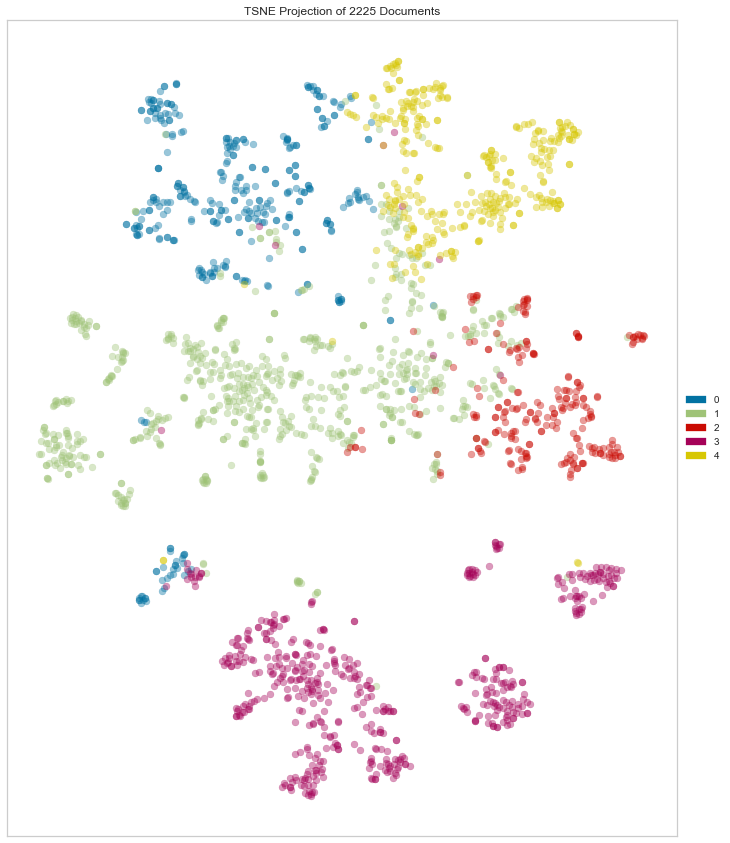

In [49]:
# unsupervised clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
y = kmeans.labels_
tsne = TSNEVisualizer(alpha=0.4)
tsne.fit(X, y)
tsne.show()

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(bbc['category'], kmeans.predict(X))

array([0, 1, 3, ..., 4, 1, 3], dtype=int32)

In [61]:
bbc.iloc[0]

category                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               tech
text        tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will b

In [100]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit_transform(X)

array([[0.94198757, 0.01430789, 0.01508802, 0.01430831, 0.01430822],
       [0.02504008, 0.21240893, 0.71757748, 0.02248613, 0.02248737],
       [0.02423101, 0.02387343, 0.90414884, 0.02387318, 0.02387354],
       ...,
       [0.91093348, 0.02207664, 0.02283695, 0.02207607, 0.02207685],
       [0.01681012, 0.01600558, 0.93521724, 0.01598358, 0.01598349],
       [0.02379044, 0.02315221, 0.90676054, 0.02315046, 0.02314634]])

In [104]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]])
        print(message)

    
feature_names = tfidf.get_feature_names()

print_top_words(lda, feature_names, 30)

Topic #0: year film best world uk market sales music growth 2004 economy number tv million mobile 000 years awards company economic set won 2005 china bank time award prices dollar second
Topic #1: ebbers boerse lse worldcom mci euronext tobacco verizon qwest bez accounting eviction printer lvmh lacroix tci mccririck cartridges bloglines deutsche stallone evicted falic slug peoplesoft curbishley pernod bach oracle sayeed
Topic #2: labour election blair government party england game told brown minister time wales club howard make bbc team software home public say just tax win prime says added ireland year campaign
Topic #3: athens kenteris iaaf holmes thanou greek radcliffe athletics olympic 60m athletes marathon olympics paula francis chepkemei sprinters gardener 1500m indoor relay medal prix uwb tests greene athlete birmingham hurdles norwich
Topic #4: fiat gm alfa ferrari roxy maserati marchionne carib uganda vagina sculptor wentworth caribs dominica cannibalism cannibals agnelli mce

In [144]:
from sklearn.neighbors import KNeighborsClassifier
y_train = pd.read_csv('data/processed/bbc_y_train.csv')
X_train = pd.read_csv('data/processed/bbc_x_train.csv')
vectorizer = TfidfVectorizer(stop_words=custom_stop_words)
X = vectorizer.fit_transform(X_train.text.tolist()) 

In [145]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X,y_train)

/Users/jeanne/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [146]:
neigh.predict(X[0])

array([3])

In [147]:
neigh.score(X,y)

0.9628297362110312

In [148]:
from joblib import dump, load
dump(neigh, 'bbc_knn.joblib')

['bbc_knn.joblib']

In [159]:
dump(vectorizer, 'bbc_vec.joblib')

['bbc_vec.joblib']

In [149]:
knn = load('bbc_knn.joblib')

In [156]:
knn.predict(X[51]) == 1

array([ True])